# Correlation
Correlation is a statistic that measures the degree to which two variables move in relation to each other <br>
Correlation shows the strength of a relationship between two variables and is expressed numerically by the correlation coefficient. <br>
##### *The Formula of Correlation*
$$
r = \frac{\sum(X-X_{Mean})(Y-Y_{Mean})}{\sqrt\sum(X-X_{Mean})^2\sqrt\sum(Y-Y_{Mean})^2)}\\
$$ <br>
<p><b>Where</b></p>
<b>r</b> = The correlation coefficient<br>
<b>$X_{Mean}$</b> = The average of observations of variable X<br>
<b>$Y_{Mean}$</b> = The average of observations of variable Y<br>
<p>The correlation coefficient's values range between -1.0 and 1.0.<br>A correlation could be positive, meaning both variables move in the same direction, or negative, meaning that when one variable’s value increases, the other variables’ values decrease. Correlation can also be neutral or zero, meaning that the variables are unrelated.</p>
<ul><li><b>Positive Correlation</b>: Both variables change in the same direction.
</li>
<li><b>Neutral Correlation</b>: No relationship in the change of the variables.
</li>
<li><b>Negative Correlation</b>: Variables change in opposite directions.
</li><ol>




### Test DataSet

<p>Before we get into calculating corelation between stocks, let’s define a dataset we can use to test the methods.</p>

In [2]:
#Importing nessesary packages
import pandas as pd
import numpy as np
from matplotlib import pyplot

#To execute plot in this notebook
%matplotlib inline

<p>Let us generate 1,000 samples of two two variables with a strong positive correlation.<br>The $1^{st}$ variable will be random numbers drawn from a Gaussian distribution with a mean of 100 and a standard deviation of 20.<br>The $2^{nd}$ variable will be values from the first variable with Gaussian noise added with a mean of a 50 and a standard deviation of 10.</p>



<p>We will use the <b><i>randn()</i></b> function to generate random Gaussian values with a mean of 0 and a standard deviation of 1, then multiply the results by our own standard deviation and add the mean to shift the values into the preferred range.<br>
Documentation:
<a href="https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html" title="numpy_randn">randn()</a></p>

In [3]:
# prepare data
dataSet_1 = 20 * np.random.randn(1000) + 100
dataSet_2 = dataSet_1 + (10 * np.random.randn(1000) + 50)
# summarize
print('dataSet_1: mean=%.3f stdv=%.3f' % (np.mean(dataSet_1), np.std(dataSet_1)))
print('dataSet_2: mean=%.3f stdv=%.3f' % (np.mean(dataSet_2), np.std(dataSet_2)))

dataSet_1: mean=99.517 stdv=19.684
dataSet_2: mean=149.994 stdv=22.347


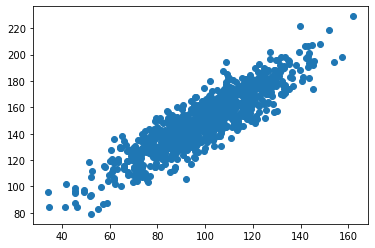

In [4]:
# plot
pyplot.scatter(dataSet_1, dataSet_2)
pyplot.show()

<p>A scatter plot of the two variables is created, from which we can observe <b>increasing</b> trend</p>

<p>Before we look at calculating some correlation scores, we must first look at an important statistical building block, called covariance.</p>



# Covariance
<p>Covariance is a measure of how much two random variables vary together. It’s similar to variance, but where variance tells you how a single variable varies, co variance tells you how two variables vary together.</p><br>
<b><i>The Formula of Covariance</i></b>
$$
Cov_{X,Y} = \frac{\sum(X_{i}-X_{Mean})(Y_{i}-Y_{Mean})}{N-1}\\
$$ <br>
<p><b>Where</b></p>
<b>$X_{i}$</b> = Data value of X<br>
<b>$Y_{i}$</b> = Data value of Y<br>
<b>$X_{Mean}$</b> = The average of observations of variable X<br>
<b>$Y_{Mean}$</b> = The average of observations of variable Y<br>
<b>N</b> = The number of data points


<p>The <b><i>cov()</i></b> NumPy function can be used to calculate a covariance matrix between two or more variables.<br>
Documentation:
<a href="https://numpy.org/doc/stable/reference/generated/numpy.cov.html" title="numpy_cov">cov()</a></p>

In [5]:
# calculate covariance matrix
covariance = np.cov(dataSet_1, dataSet_2)
print(covariance)

[[387.86345961 391.6227251 ]
 [391.6227251  499.89682009]]


<p>The covariance between the two variables is 389.75. We can see that it is <b>positive</b>, suggesting the variables change in the <b>same direction</b> as we expect.</p><br>

*Limitation:*
<p>A problem with covariance as a statistical tool alone is that it is challenging to interpret. This leads us to the Pearson’s correlation coefficient next.</p>





# Pearson’s Correlation

<p>The Pearson correlation coefficient (named for Karl Pearson) can be used to summarize the strength of the linear relationship between two data samples.<br>
The Pearson’s correlation coefficient is calculated as the covariance of the two variables divided by the product of the standard deviation of each data sample. It is the normalization of the covariance between the two variables to give an interpretable score.</p><br>

##### *The Formula of Pearson's Correlation coeeficient*
$$
r = \frac{\sum(X_{i}-X_{Mean})(Y_{i}-Y_{Mean})}{\sqrt\sum(X_{i}-X_{Mean})^2\sqrt\sum(Y_{i}-Y_{Mean})^2)}\\
$$ <br>
<p><b>Where</b></p>
<b>r</b> = The correlation coefficient<br>
<b>$X_{i}$</b> = Data value of X<br>
<b>$Y_{i}$</b> = Data value of Y<br>
<b>$X_{Mean}$</b> = The average of observations of variable X<br>
<b>$Y_{Mean}$</b> = The average of observations of variable Y<br>

<p>The <i><b>pearsonr()</b></i> SciPy function can be used to calculate the Pearson’s correlation coefficient between two data samples with the same length.<br>
    Documentation:
    <a href="https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html" title="Scipy_pearsonr()">pearsonr()</a></p>



<p>Let us calculate the correlation between the two variables in our test dataset.</p>

In [6]:
#Importing Scipy library
import scipy
from scipy.stats import pearsonr

In [8]:
# calculate Pearson's correlation
corr, _ = pearsonr(dataSet_1, dataSet_2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.889


We can clearly interpret that the two variables are <b>positively</b> correlated and that the correlation is <b>0.8</b>. This suggests a high level of correlation, <br>E.g. a value above 0.5 and close to 1.0.



# Standard Error for Pearson's Correlation coefficient

As always, we can generate estimates with confidence intervals and test hypotheses about a statistic if we know its expected distribution. If the data are normally distributed, and if the null hypothesis is that there is zero correlation, Pearson’s correlation coefficient follows a t-distribution, where the standard error of Pearson’s correlation coefficient is:

$$ S_r = \sqrt{\frac{1-r^2}{n-2}} $$

The t-test for Pearson’s r has the standard setup, that is, the statistic minus the null hypothesis for the parameter, divided by the standard error of the statistic:

$$ t = \frac{r-\rho}{S_r} $$

Since the null hypothesis is that the correlation is zero, the ρ term drops out, and the t-statistic is simply Pearson’s correlation coefficient divided by its standard error. The t-test of Pearson’s correlation coefficient has n-2 degrees of freedom, because population variance is estimated for two variables, not just one.

All t-tests assume random sampling and that the statistic is normally distributed. In this case, Pearson’s r will be normally distributed when the null hypothesis is that ρ equals zero, and if both variables are normally distributed. Finally, the test assumes that the correlation coefficient is calculated on interval or ratio data. If you have ordinal data, you must use a non-parametric test.

Reference:<br>
<li><a href="http://strata.uga.edu/8370/lecturenotes/correlation.html" title="Data Analysis in the Geosciences">Standard Error for Pearson's Correlation coefficient</a></li><br>




# Correlation coeeficient to predict stock movements

The correlation coefficient has limited ability in predicting returns in the stock market for individual stocks. Still, the statistical measurement may have value in predicting the extent to which two stocks move in relation to each other because the correlation coefficient is a measure of the relationship between how two stocks move in tandem with each other, as well as the strength of that relationship.

## Testing on Data of NIFTY50 F&O Data

The Raw data consists of F&O combined, First we need to seperate them

In [39]:
#Importing nessesary libraries
import pandas as pd
import re
import datetime
from dateutil.relativedelta import relativedelta

### Reading CSV Data

we will use <b><i>pd.read_csv()</i></b> to read CSV file<br>
Documentation:<br>
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html" title="pd.read_csv()">pd.read_csv()</a>



In [40]:
#Reading Data
rawdata = pd.read_csv('GFDLNFO_CONTRACT_02082019.csv')
raw_data=pd.DataFrame(data=rawdata)
raw_data.sample()

,Ticker,Date,Time,Open,High,Low,Close,Volume,Open Interest
325278,TCS29AUG192260CE.NFO,02/08/2019,12:55:59,18.55,18.55,17.4,17.4,500,60500


### Seggregate Raw data into F&O

For seggregating we should iterate through each and every ticker so to do this we used <b><i>lambda</i></b> function,<br> & then we split each and every ticker using <b><i>str.rsplit()</i></b><br>In order to apply split for each and every ticker we used <b><i>apply()</i></b><br>

Documentation:<br>
1.<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.rsplit.html" title="str.rsplit">str.rsplit()</a><br>
2.<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html" title="apply()">apply(</a><br>



In [41]:
%%time
#Function to segreagate raw data
def segregate_data(raw_data):
    #Making copy of originbal data
    data=raw_data.copy()
    data.loc[:,'Ticker']=data.Ticker.str.rsplit('.',n=1,expand=True)[0]
    data.loc[:,'Contract']=data.Ticker.apply(lambda x:'Future' if x[-3:]=='FUT' else('Option' if (x[-1:]=='E') else None ))
    data.loc[:,'Type']=data.Ticker.apply(lambda x:x[-3:] if x[-3:]=='FUT' else x[-2:])
    data.loc[:,'Ticker']=data.Ticker.apply(lambda x:x[:-3] if x[-3:]=='FUT' else x[:-2])
    data.loc[:,'Date']=data.Date.apply(lambda x: str(datetime.datetime.strptime(x,'%d/%m/%Y').strftime('%Y-%m-%d')))
    data.loc[:,'Time']=data.Time.apply(lambda x: '0'+x if x[1]==':' else x)
    data.loc[:,'TimeStamp']=pd.to_datetime(data.Date+' '+data.Time)
    future_data = data[data.loc[:,'Contract']=='Future'].reset_index().drop('index',axis=1)
    option_data = data[data.loc[:,'Contract']=='Option'].reset_index().drop('index',axis=1)
    return future_data,option_data
futures,options = segregate_data(raw_data)
    

Wall time: 6.19 s


In [42]:
futures

,Ticker,Date,Time,Open,High,Low,Close,Volume,Open Interest,Contract,Type,TimeStamp
0,ACC19AUG,2019-08-02,09:15:59,1515.00,1515.00,1510.55,1512.75,14000,2293200,Future,FUT,2019-08-02 09:15:59
1,ACC19AUG,2019-08-02,09:16:59,1512.75,1513.65,1508.50,1511.55,17200,2293200,Future,FUT,2019-08-02 09:16:59
2,ACC19AUG,2019-08-02,09:17:59,1511.55,1512.80,1509.75,1510.55,12400,2306800,Future,FUT,2019-08-02 09:17:59
3,ACC19AUG,2019-08-02,09:18:59,1510.00,1510.45,1505.25,1507.50,14400,2306800,Future,FUT,2019-08-02 09:18:59
4,ACC19AUG,2019-08-02,09:19:59,1507.50,1508.85,1506.65,1506.65,6800,2306800,Future,FUT,2019-08-02 09:19:59
...,...,...,...,...,...,...,...,...,...,...,...,...
62307,ZEEL19SEP,2019-08-02,15:11:59,344.55,345.90,344.55,345.90,1300,422500,Future,FUT,2019-08-02 15:11:59
62308,ZEEL19SEP,2019-08-02,15:18:59,345.90,345.90,344.25,344.25,1300,421200,Future,FUT,2019-08-02 15:18:59
62309,ZEEL19SEP,2019-08-02,15:20:59,344.25,344.25,344.15,344.15,1300,421200,Future,FUT,2019-08-02 15:20:59
62310,ZEEL19SEP,2019-08-02,15:21:59,344.15,344.35,343.50,344.35,7800,421200,Future,FUT,2019-08-02 15:21:59


In [43]:
options

,Ticker,Date,Time,Open,High,Low,Close,Volume,Open Interest,Contract,Type,TimeStamp
0,ACC29AUG191400,2019-08-02,12:02:59,7.50,7.50,7.50,7.50,400,15200,Option,PE,2019-08-02 12:02:59
1,ACC29AUG191400,2019-08-02,14:06:59,6.50,6.50,6.50,6.50,400,15600,Option,PE,2019-08-02 14:06:59
2,ACC29AUG191400,2019-08-02,14:28:59,6.30,6.30,6.30,6.30,400,15600,Option,PE,2019-08-02 14:28:59
3,ACC29AUG191400,2019-08-02,14:54:59,7.50,7.50,7.50,7.50,800,15200,Option,PE,2019-08-02 14:54:59
4,ACC29AUG191400,2019-08-02,15:07:59,7.50,7.50,6.25,6.25,800,15200,Option,PE,2019-08-02 15:07:59
...,...,...,...,...,...,...,...,...,...,...,...,...
291604,ZEEL29AUG19460,2019-08-02,15:23:59,0.80,0.80,0.80,0.80,1300,114400,Option,CE,2019-08-02 15:23:59
291605,ZEEL29AUG19460,2019-08-02,15:25:59,0.80,0.80,0.80,0.80,1300,113100,Option,CE,2019-08-02 15:25:59
291606,ZEEL29AUG19460,2019-08-02,15:27:59,0.85,0.85,0.85,0.85,1300,114400,Option,CE,2019-08-02 15:27:59
291607,ZEEL29AUG19480,2019-08-02,12:29:59,0.55,0.55,0.55,0.55,1300,81900,Option,CE,2019-08-02 12:29:59


In [44]:
#Check for Correct Segregation
if len(raw_data)==(len(futures)+len(options)):
    print('True')
else:
    print('False')

True


We consider Futures Closing prices as Underlying Close prices to calculate Correlation between Instruments

### Cleaning Futures

Now we split Ticker

In [45]:
%%time
#Cleaning Futures
def cleaning_futures(futures):
    fut=futures.copy()
    fut.loc[:,'Expiry']=fut.Ticker.apply(lambda x: '20'+x[-5:])
    fut.loc[:,'Ticker']=fut.Ticker.apply(lambda x: x[:-5])
    fut = fut.sort_values(['Ticker','TimeStamp'])
    data = fut[['Ticker','TimeStamp','Close','Expiry']]
    return data
futures_df = cleaning_futures(futures)
futures_df

Wall time: 86 ms


,Ticker,TimeStamp,Close,Expiry
0,ACC,2019-08-02 09:15:59,1512.75,2019AUG
1,ACC,2019-08-02 09:16:59,1511.55,2019AUG
2,ACC,2019-08-02 09:17:59,1510.55,2019AUG
3,ACC,2019-08-02 09:18:59,1507.50,2019AUG
4,ACC,2019-08-02 09:19:59,1506.65,2019AUG
...,...,...,...,...
62229,ZEEL,2019-08-02 15:27:59,342.20,2019AUG
62230,ZEEL,2019-08-02 15:28:59,342.10,2019AUG
62231,ZEEL,2019-08-02 15:29:59,341.75,2019AUG
62311,ZEEL,2019-08-02 15:29:59,342.90,2019SEP


In [54]:
#Making list of Tickers
ticker_list = futures_df['Ticker'].unique().tolist()
ticker_list

['ACC',
 'ADANIENT',
 'ADANIPORTS',
 'ADANIPOWER',
 'AMARAJABAT',
 'AMBUJACEM',
 'APOLLOHOSP',
 'APOLLOTYRE',
 'ARVIND',
 'ASHOKLEY',
 'ASIANPAINT',
 'AUROPHARMA',
 'AXISBANK',
 'BAJAJ-AUTO',
 'BAJAJFINSV',
 'BAJFINANCE',
 'BALKRISIND',
 'BANKBARODA',
 'BANKINDIA',
 'BANKNIFTY',
 'BATAINDIA',
 'BEL',
 'BERGEPAINT',
 'BHARATFORG',
 'BHARTIARTL',
 'BHEL',
 'BIOCON',
 'BOSCHLTD',
 'BPCL',
 'BRITANNIA',
 'BSOFT',
 'CADILAHC',
 'CANBK',
 'CASTROLIND',
 'CENTURYTEX',
 'CESC',
 'CHOLAFIN',
 'CIPLA',
 'COALINDIA',
 'COLPAL',
 'CONCOR',
 'CUMMINSIND',
 'DABUR',
 'DHFL',
 'DISHTV',
 'DIVISLAB',
 'DLF',
 'DRREDDY',
 'EICHERMOT',
 'ENGINERSIN',
 'EQUITAS',
 'ESCORTS',
 'EXIDEIND',
 'FEDERALBNK',
 'GAIL',
 'GLENMARK',
 'GMRINFRA',
 'GODREJCP',
 'GRASIM',
 'HAVELLS',
 'HCLTECH',
 'HDFC',
 'HDFCBANK',
 'HEROMOTOCO',
 'HEXAWARE',
 'HINDALCO',
 'HINDPETRO',
 'HINDUNILVR',
 'HINDZINC',
 'IBULHSGFIN',
 'ICICIBANK',
 'ICICIPRULI',
 'IDBI',
 'IDEA',
 'IDFCFIRSTB',
 'IGL',
 'INDIGO',
 'INDUSINDBK',
 'INFRAT

### Calculating Correlation between instruments based on their close prices for different Time horizons as input

We will now calculate correlation between instruments, to do so first we have to make a list of tickers by using <b><i>unique() & tolist()</i></b> and by using <b><i>pd.date_range()</i></b> function we create time time stamp from 19:15:59 to 15:29:59 for each ticker and later on we merge and back fill and front fill close prices with original futures data using <b><i>merge_asof()</i></b><br>

Documentation:<br>
1.<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.unique.html" title="unique()">unique()</a><br>
2.<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.tolist.html" title="tolist()">tolist()</a><br>
3.<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.date_range.html" title="pd.date_range()">pd.date_range()</a><br>
4.<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.merge_asof.html" title="merge_asof()">merge_asof()</a><br>

In [46]:
%%time
def correlation_ref(data_df,time_horizon):
    data = data_df.copy()
    ticker_list = data['Ticker'].unique().tolist()
    min_date = data['TimeStamp'].min()
    max_date = data['TimeStamp'].max()
    return_df = pd.DataFrame()
    for ticker in ticker_list:
        grid_df = pd.DataFrame(pd.date_range(min_date,max_date,freq=time_horizon),columns=['TimeStamp'])
        df = data[data['Ticker']==ticker].copy()
        df['Return'] = df.Close.pct_change()
        grid_df['Ticker'] = ticker
        merge_df = pd.merge_asof(grid_df,df,left_on='TimeStamp',right_on='TimeStamp',by='Ticker',tolerance=pd.Timedelta(minutes=15),direction='nearest')
        return_df = pd.concat([return_df,merge_df],ignore_index=True)
        df_pivot = return_df.pivot('TimeStamp','Ticker','Return')
        corr_df = df_pivot.corr(method='pearson')
    return corr_df
corr = correlation_ref(futures_df,'60min')
corr
    

Wall time: 1.95 s


Ticker,ACC,ADANIENT,ADANIPORTS,ADANIPOWER,AMARAJABAT,AMBUJACEM,APOLLOHOSP,APOLLOTYRE,ARVIND,ASHOKLEY,...,UBL,UJJIVAN,ULTRACEMCO,UNIONBANK,UPL,VEDL,VOLTAS,WIPRO,YESBANK,ZEEL
Ticker,,,,,,,,,,,,,,,,,,,,,
ACC,1.000000,0.454267,0.914867,0.640808,0.009893,0.412552,0.124394,0.637477,0.162686,0.185686,...,0.769625,0.705146,0.536213,0.080873,-0.277666,0.264185,0.058141,-0.518616,0.554304,0.824222
ADANIENT,0.454267,1.000000,0.381552,0.455560,-0.490212,-0.287554,0.568936,0.860740,0.091547,0.059022,...,0.845467,0.719959,-0.005929,0.859196,0.625146,0.386557,0.348184,0.001565,-0.315658,0.852048
ADANIPORTS,0.914867,0.381552,1.000000,0.580072,0.006461,0.602529,-0.228478,0.444044,0.348306,0.477767,...,0.578764,0.420199,0.806771,0.070492,-0.106970,-0.116784,-0.331987,-0.377472,0.480802,0.773563
ADANIPOWER,0.640808,0.455560,0.580072,1.000000,-0.678268,-0.070118,0.161719,0.472051,-0.488805,0.008994,...,0.513567,0.670331,0.307564,0.034164,-0.101065,0.189768,0.181906,-0.130747,0.442382,0.521503
AMARAJABAT,0.009893,-0.490212,0.006461,-0.678268,1.000000,0.638677,-0.210233,-0.189479,0.507878,0.251991,...,-0.238696,-0.361891,0.167240,-0.244748,-0.403761,-0.163256,-0.237684,-0.121128,0.028237,-0.168895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VEDL,0.264185,0.386557,-0.116784,0.189768,-0.163256,-0.607536,0.853674,0.515186,-0.258663,-0.795845,...,0.640114,0.766416,-0.671472,0.159069,-0.212458,1.000000,0.925853,-0.510571,0.201368,0.312804
VOLTAS,0.058141,0.348184,-0.331987,0.181906,-0.237684,-0.686580,0.943944,0.514876,-0.520967,-0.738564,...,0.477455,0.701115,-0.777522,0.229779,-0.136272,0.925853,1.000000,-0.181249,-0.038267,0.132662
WIPRO,-0.518616,0.001565,-0.377472,-0.130747,-0.121128,0.033178,-0.031451,-0.021645,-0.320933,0.515568,...,-0.443798,-0.365321,0.028894,0.370667,0.492320,-0.510571,-0.181249,1.000000,-0.695308,-0.403918


<B>From above we had Calculated Correlation on bases of Close Prices of Stocks with Time Horizon = 60min</B>

## Now we are going to Plot heatmap of the correlations between selected instruments 

For this, we need to define tickers on which we are going to calculate correlatios and plot heatmap for those correlations

In [55]:
#Defining selected tickers
symbols_list = ['BHEL', 'CANBK', 'IDBI', 'INFY', 'MINDTREE', 'TCS', 'WIPRO', 'YESBANK']

In [56]:
#Importing libraries
import matplotlib.pyplot as plt
import seaborn

Now we calculate correlation for the selected tickers

In [57]:
%%time
def correlation_ref_select(data_df,time_horizon):
    data = data_df.copy()
    ticker_list = data['Ticker'].unique().tolist()
    min_date = data['TimeStamp'].min()
    max_date = data['TimeStamp'].max()
    return_df = pd.DataFrame()
    for ticker in symbols_list:
        grid_df = pd.DataFrame(pd.date_range(min_date,max_date,freq=time_horizon),columns=['TimeStamp'])
        df = data[data['Ticker']==ticker].copy()
        df['Return'] = df.Close.pct_change()
        grid_df['Ticker'] = ticker
        merge_df = pd.merge_asof(grid_df,df,left_on='TimeStamp',right_on='TimeStamp',by='Ticker',tolerance=pd.Timedelta(minutes=15),direction='nearest')
        return_df = pd.concat([return_df,merge_df],ignore_index=True)
        df_pivot = return_df.pivot('TimeStamp','Ticker','Return')
        corr_dff = df_pivot.corr(method='pearson')
    return corr_dff
corr_selected_tickers = correlation_ref_select(futures_df,'60min')
corr_selected_tickers

Wall time: 138 ms


Ticker,BHEL,CANBK,IDBI,INFY,MINDTREE,TCS,WIPRO,YESBANK
Ticker,,,,,,,,
BHEL,1.000000,0.256228,0.776192,-0.131729,-0.232932,0.377505,0.540375,-0.461899
CANBK,0.256228,1.000000,0.188036,0.019006,-0.554020,0.453217,-0.173357,-0.047606
IDBI,0.776192,0.188036,1.000000,-0.709668,0.027058,0.599068,0.082429,0.097975
INFY,-0.131729,0.019006,-0.709668,1.000000,0.211366,-0.098171,-0.101391,-0.466644
MINDTREE,-0.232932,-0.554020,0.027058,0.211366,1.000000,0.350359,-0.599294,0.573340
TCS,0.377505,0.453217,0.599068,-0.098171,0.350359,1.000000,-0.644335,0.331534
WIPRO,0.540375,-0.173357,0.082429,-0.101391,-0.599294,-0.644335,1.000000,-0.695308
YESBANK,-0.461899,-0.047606,0.097975,-0.466644,0.573340,0.331534,-0.695308,1.000000


### Now we plot a heatmap of the correlations (with Seaborn and Matplotlib) to better visualize the results<br>

Documentation:<br>
1.<a href="https://seaborn.pydata.org/" title="seaborn">seaborn</a><br>
2.<a href="https://matplotlib.org/users/index.html" title="matplotlib">matplotlib</a><br>

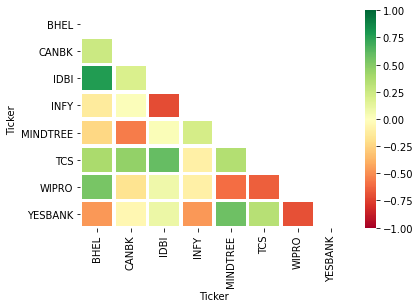

In [58]:
#take the bottom triangle since it repeats itself
mask = np.zeros_like(corr_selected_tickers)
mask[np.triu_indices_from(mask)] = True
#generate plot
seaborn.heatmap(corr_selected_tickers, cmap='RdYlGn', vmax=1.0, vmin=-1.0 , mask = mask, linewidths=2.5)
plt.yticks(rotation=0)
plt.xticks(rotation=90) 
plt.show()